# Exercise 5.2

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Heat map

In [2]:
#Load in data
flight = pd.read_csv("flights.csv")
flight.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [3]:
#Create matrix by pivoting dataframe
flight_matrix = flight.pivot("month", "year", "passengers")
flight_matrix

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


Text(0.5, 1.0, 'Heatmap of Flight Density from 1949 to 1961')

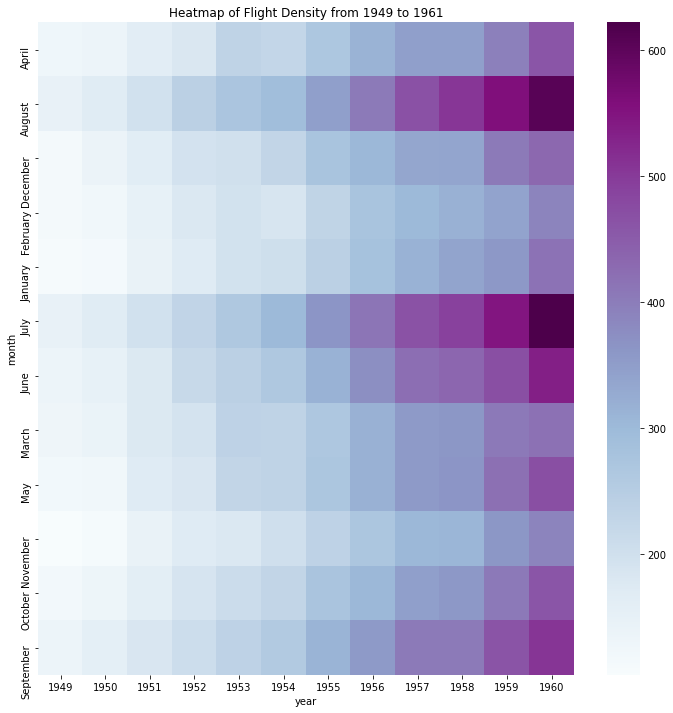

In [4]:
#Use Seaborn to create heatmap
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(flight_matrix, cmap='BuPu')
r.set_title("Heatmap of Flight Density from 1949 to 1961")


### Spatial chart

In [5]:
#Installed folium
!pip install folium

In [6]:
#Load folium and add map
import folium
folium.Map()

In [7]:
#Read in file 
costco = pd.read_csv("costcos-geocoded.csv")
costco.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [8]:
costco = costco.iloc[0:418, :]
map_it = folium.Map(location=[48, -102], zoom_start = 3)
locations = folium.map.FeatureGroup()
for lat, lng in zip(costco.Latitude, costco.Longitude):
    locations.add_child(
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    color='yellow',
    fill=True,
    fill_color='blue',
    fill_opacity=0.6))
map_it.add_child(locations)

### Contour plot

In [9]:
#Read in data
faithful = pd.read_csv("faithful.csv")
faithful.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [10]:
#Remove the first column that randomly showed up
faithful.drop(faithful.columns[0], axis = 1)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [11]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [12]:
x = np.linspace(0, faithful.eruptions, 50)
y = np.linspace(0, faithful.waiting, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [14]:
# plt.contour(X, Y, Z, 20, cmap='RdGy');

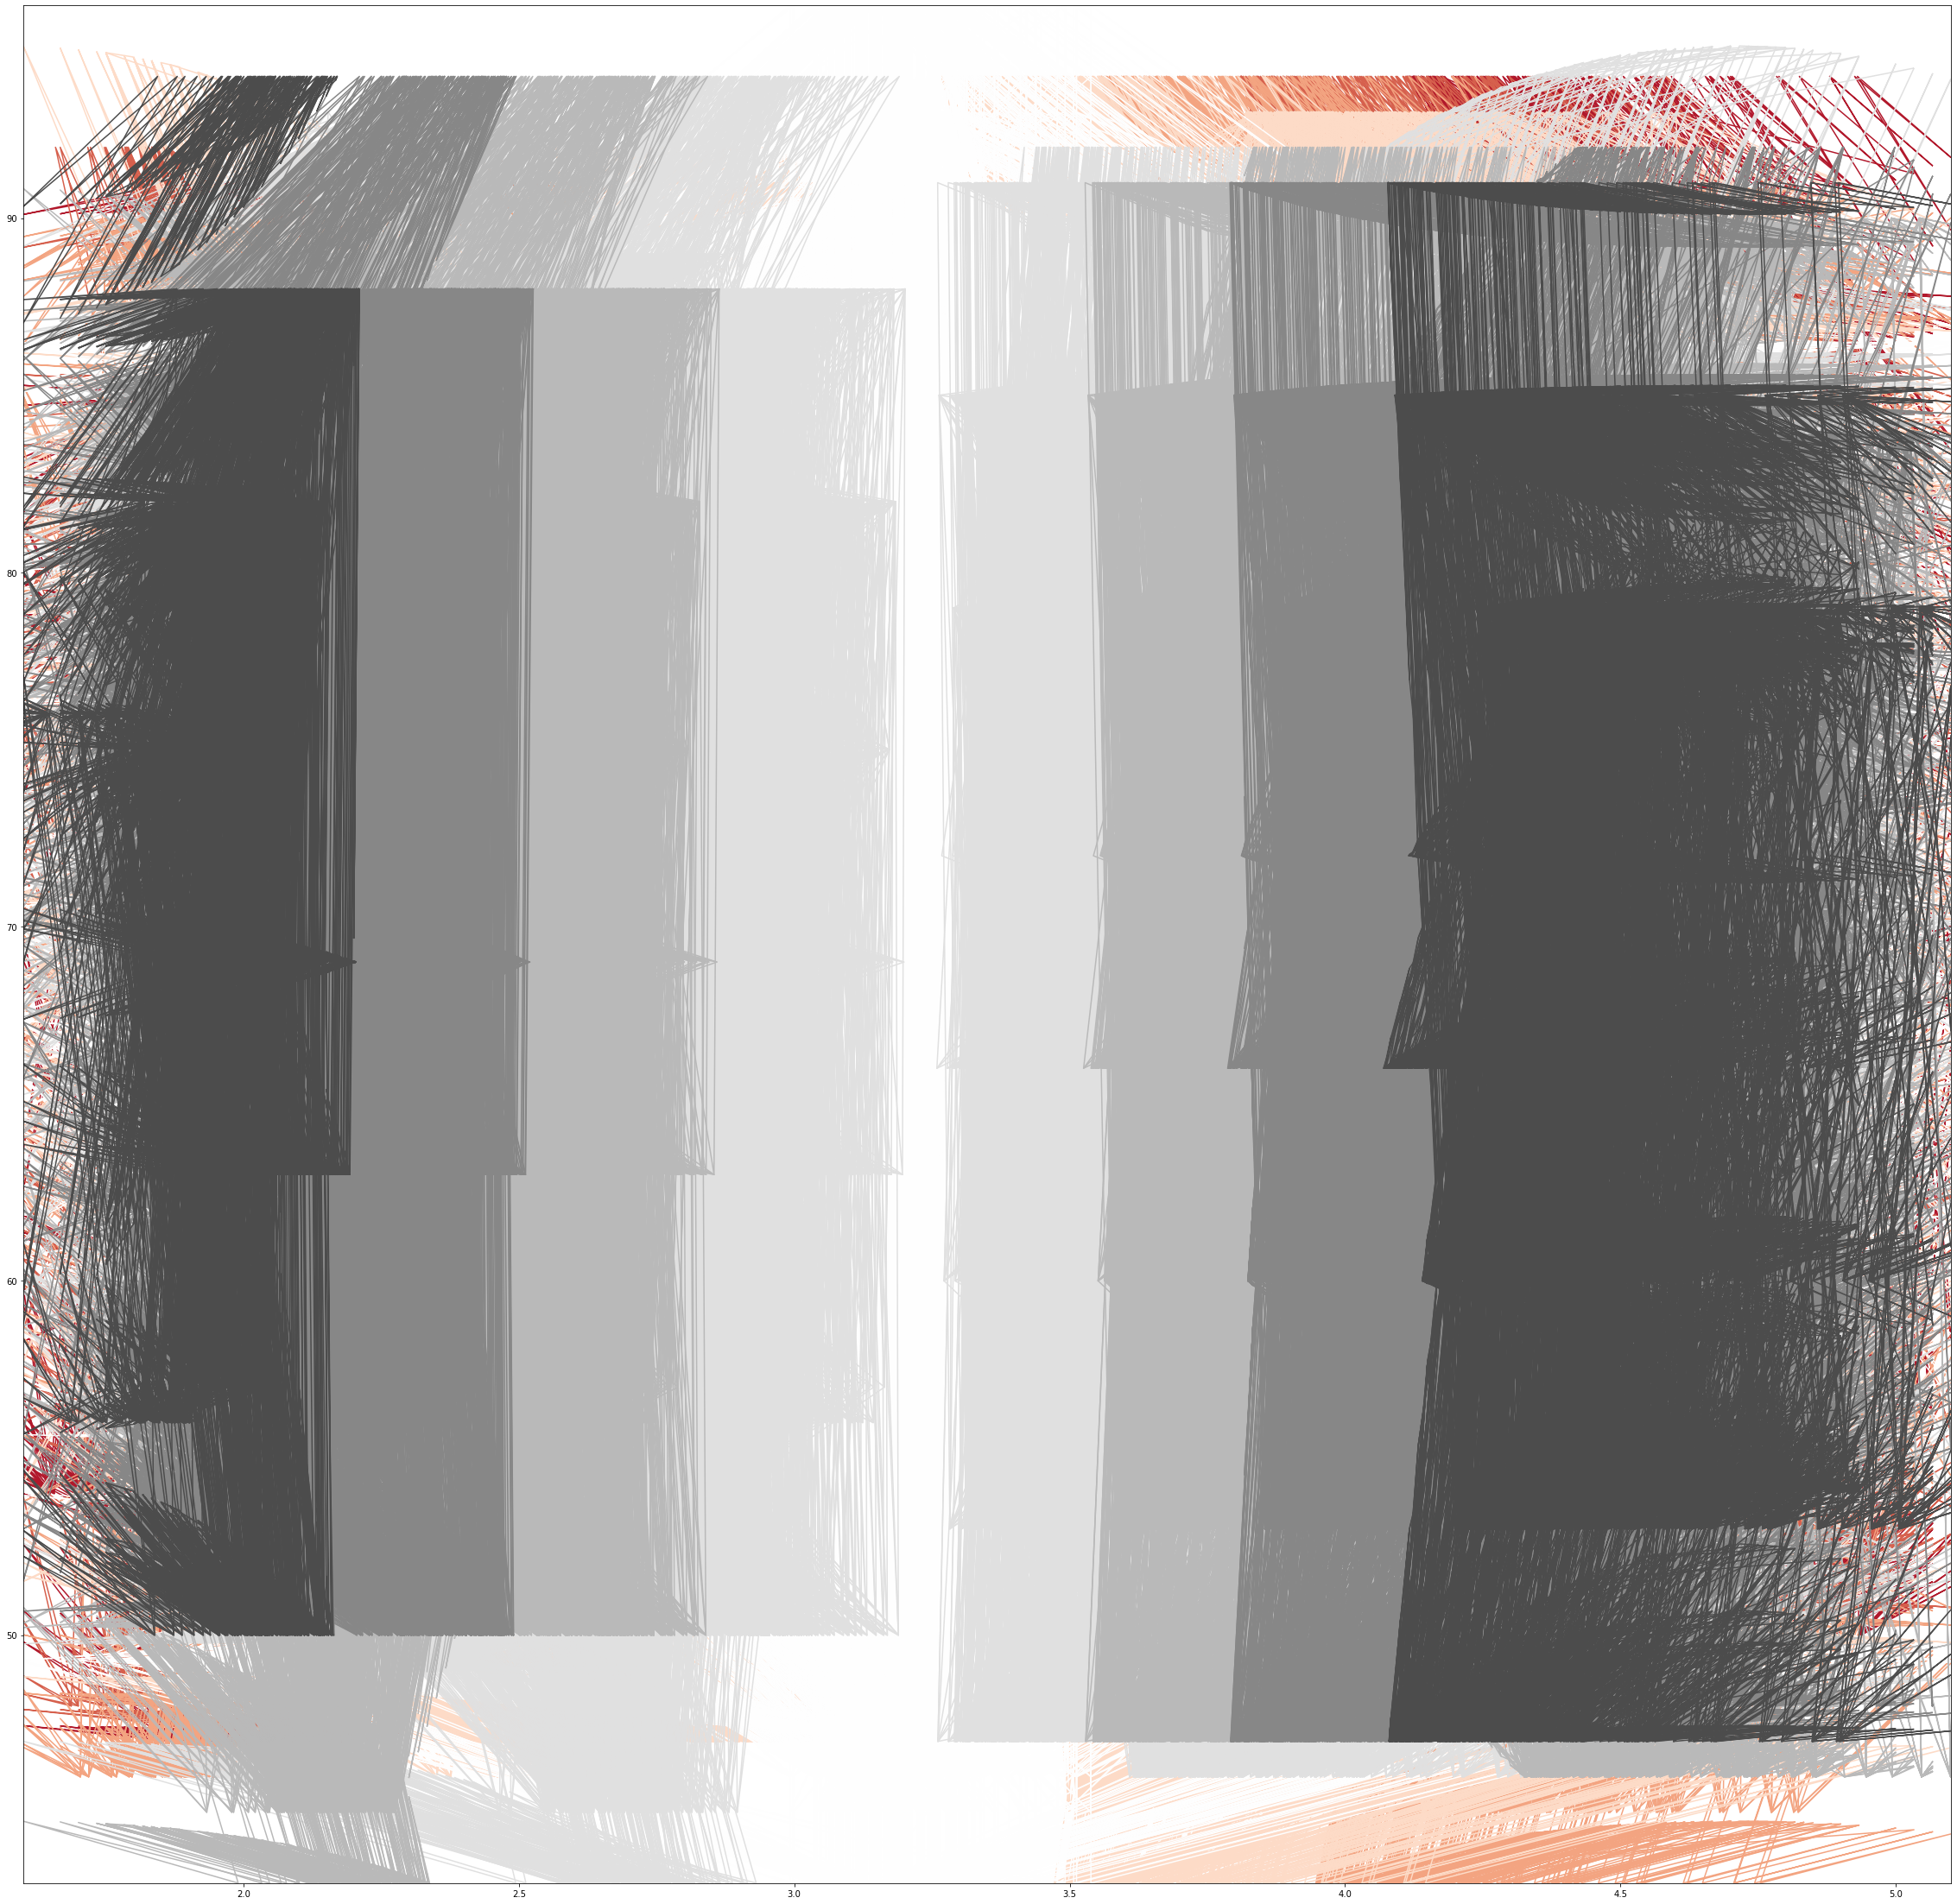

In [22]:
#Create the contour plot
x = faithful.eruptions
y = faithful.waiting
x, y = np.meshgrid(x, y)
z = np.sin(x)*np.cos(y)

fig, ax = plt.subplots(figsize=(40,40))

ax.contour(x, y, z, 10, cmap='RdGy')
plt.show()

```
Looks like this graph has too much data to present so it is not showing the conture plot clean. 
```